In [2]:
import pandas as pd
from functools import reduce

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier

In [3]:
feature_dir = 'data/features/'

In [4]:
def run_experiment(model, X, y):
    scores = []
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    print('Scores',scores)
    print('Average score', sum(scores)/len(scores))

In [30]:
df_twitter = pd.read_csv(feature_dir+'twitter_features.csv')
df_news = pd.read_csv(feature_dir+'news_features.csv')
df_out= pd.read_csv(feature_dir+'index_features.csv')

In [31]:
clf = SVC(C=1.0)
clf2 = SVR(C=1.0)

In [32]:
df_y = df_out
df_X = pd.merge(df_twitter, df_news, on='Date', how='outer')

In [33]:
df_y

,Date,Change VIX,Lag 2 Change VIX,Lag 2 Significant VIX,Change SPY,Lag 2 Change SPY,Lag 2 Significant SPY
0,2015-01-02,0.116279,0.144707,1,-0.007741,-0.020787,-1
1,2015-01-05,0.080518,0.050026,1,-0.010708,-0.013469,-1
2,2015-01-06,0.059406,-0.118052,-1,-0.010188,0.009501,0
3,2015-01-07,-0.008854,-0.184119,-1,-0.003315,0.024724,1
4,2015-01-08,-0.110174,0.005020,0,0.012859,0.001961,0
...,...,...,...,...,...,...,...
499,2016-12-23,0.005300,0.044815,1,-0.000754,0.005057,0
500,2016-12-27,0.077329,0.072594,1,0.002617,-0.006814,0
501,2016-12-28,-0.030179,0.110177,1,0.002433,-0.008121,0
502,2016-12-29,0.105971,0.069962,1,-0.009225,0.002495,0


In [9]:
X = df_X.reset_index(drop=True)
y = df_y.reset_index(drop=True)
X = X.drop(columns=['Date'])
X.fillna(X.mean(), inplace=True)
y = y['Lag 2 Significant VIX']
y.fillna(y.mean(), inplace=True)

In [10]:
X

,BarackObama_sentiment_score,BarackObama_heuristic_score,cnnbrk_sentiment_score,cnnbrk_heuristic_score,KimKardashian_sentiment_score,KimKardashian_heuristic_score,New York Times_sentiment_score,CNN_sentiment_score,Washington Post_sentiment_score
0,0.816094,6.402818,-2.54383,-15.147706,1.504453,12.688323,-1.230945,-4.2102,-1.884661
1,1.220500,9.206268,-2.54383,-15.147706,1.504453,12.688323,-1.230945,-1.4093,-1.884661
2,0.643600,7.880455,-2.54383,-15.147706,4.065300,37.652221,-1.230945,1.0081,-1.884661
3,5.633600,40.112804,-2.54383,-15.147706,0.915400,8.877281,-1.230945,-0.9171,-1.884661
4,1.112100,9.476567,-2.54383,-15.147706,1.715000,16.294419,-1.230945,-2.5206,-1.884661
...,...,...,...,...,...,...,...,...,...
499,0.816094,6.402818,-3.50000,-22.894771,1.504453,12.688323,0.366700,-3.5821,-2.920500
500,0.816094,6.402818,-1.11410,-7.601923,1.504453,12.688323,-0.991300,-3.0340,-0.117200
501,0.816094,6.402818,-1.76330,-11.564171,1.504453,12.688323,2.958000,-1.1407,-1.727400
502,0.816094,6.402818,-0.24280,-1.812420,1.504453,12.688323,0.990100,-0.4297,-0.282200


In [11]:
y.value_counts()

-1    238
 1    219
 0     47
Name: Lag 2 Significant VIX, dtype: int64

In [12]:
# Guessing Most common class always
succ = y.value_counts().max()/(y.count())

In [13]:
succ

0.4722222222222222

In [14]:
run_experiment(clf, X, y)

Scores [0.45544554455445546, 0.5148514851485149, 0.48514851485148514, 0.49504950495049505, 0.52]
Average score 0.4940990099009901


In [15]:
def rfc_param_selection(X, y):
    n_estims= [200, 700]
    max_feats= ['auto', 'sqrt', 'log2']
    param_grid = {'n_estimators': n_estims, 'max_features' : max_feats}
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1)
    grid_search.fit(X, y)
    grid_search.best_params_
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search.best_params_

In [16]:
def svc_param_selection(X, y):
    kernels = ['rbf','linear']
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel':kernels}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=5)
    grid_search.fit(X, y)
    grid_search.best_params_
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search.best_params_

In [17]:
def MLP_param_selection(X, y):
    solvers = ['lbfgs', 'sgd']
    max_iters = [1000,1500,2000 ]
    alphas = [10,100,1000,10000]
    hidden_layer_sizes = [10,12,15]
    random_states = [i for i in range(10)]
    param_grid = {'solver': solvers, 'max_iter': max_iters, 'alpha': alphas, 'hidden_layer_sizes':hidden_layer_sizes, 'random_state':random_states}
    

    grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, verbose=5)
    grid_search.fit(X, y)
    grid_search.best_params_
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search.best_params_


In [ ]:
svc_param_selection(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.47058823529411764, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.47058823529411764, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.4752475247524752, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ..... C=0.001, gamma=0.001, kernel=rbf, score=0.47, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.47474747474747475, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=0.43137254901960786, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.47058823529411764, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.47058823529411764, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.4752475247524752, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ...... C=0.001, gamma=0.01, kernel=rbf, score=0.47, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.47474747474747475, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV]  C=0.001, gamma=0.01, kernel=linear, score=0.43137254901960786, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .... C=0.001, gamma=0.01, kernel=linear, score=0.5, total=   0.0s
[CV] C=0.001, gamma=0.01, kern

[CV]  C=0.01, gamma=0.1, kernel=linear, score=0.5098039215686274, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV]  C=0.01, gamma=0.1, kernel=linear, score=0.43564356435643564, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ...... C=0.01, gamma=0.1, kernel=linear, score=0.5, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV]  C=0.01, gamma=0.1, kernel=linear, score=0.5151515151515151, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.47058823529411764, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.47058823529411764, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.4752475247524752, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf ..

[CV]  C=1, gamma=0.001, kernel=rbf, score=0.45544554455445546, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .......... C=1, gamma=0.001, kernel=rbf, score=0.5, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.494949494949495, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.45098039215686275, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ....... C=1, gamma=0.001, kernel=linear, score=0.5, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.46534653465346537, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ...... C=1, gamma=0.001, kernel=linear, score=0.54, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear ............

[CV]  C=10, gamma=0.01, kernel=linear, score=0.5050505050505051, total=  24.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.43137254901960786, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.43137254901960786, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.48514851485148514, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .......... C=10, gamma=0.1, kernel=rbf, score=0.38, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.45454545454545453, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.46078431372549017, total=  32.7s
[CV] C=10, gamma=0.1, kernel=linear .....

KeyboardInterrupt: 

In [ ]:
rfc_param_selection(X,y)

In [18]:
model = RandomForestClassifier(max_features='log2',n_estimators=200)
run_experiment(model, X, y)

Scores [0.5148514851485149, 0.46534653465346537, 0.5544554455445545, 0.4752475247524752, 0.47]
Average score 0.4959801980198019


In [19]:
model = SVC(C=1, gamma=.1, kernel='rbf')
run_experiment(model, X, y)

Scores [0.5148514851485149, 0.5445544554455446, 0.5841584158415841, 0.4158415841584158, 0.48]
Average score 0.5078811881188119


In [ ]:
MLP_param_selection(X,y)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.495, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.545, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.525, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.554, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.560, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd, score=0.465, total=   1.9s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs, score=0.515, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs, score=0.525, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs, score=0.554, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs, score=0.535, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=lbfgs, score=0.520, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.475, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.535, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.545, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.505, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.560, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.485, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.485, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs, score=0.465, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs, score=0.525, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs, score=0.604, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs, score=0.564, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=lbfgs, score=0.550, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd, score=0.515, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd, score=0.416, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.485, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.545, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.495, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.535, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.550, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs, score=0.545, total=   1.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs, score=0.554, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs, score=0.515, total=   1.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs, score=0.530, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd, score=0.446, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd, score=0.386, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd, score=0.446, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs, score=0.525, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs, score=0.525, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs, score=0.505, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs, score=0.510, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd, score=0.416, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd, score=0.554, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd, score=0.436, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs, score=0.475, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs, score=0.545, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs, score=0.535, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs, score=0.495, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs, score=0.560, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.446, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.426, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.396, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.475, total=   1.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.545, total=   1.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.525, total=   1.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.535, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.580, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.396, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.396, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.535, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.535, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.535, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.540, total=   1.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd, score=0.455, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd, score=0.455, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd, score=0.426, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd, score=0.505, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs, score=0.560, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs, score=0.515, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs, score=0.525, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs, score=0.554, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs, score=0.525, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs, score=0.520, total=   1.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.535, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.525, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.604, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.564, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.550, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd, score=0.515, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd, score=0.416, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=lbfgs, score=0.525, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=lbfgs, score=0.540, total=   1.8s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.446, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.475, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd, score=0.426, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd, score=0.505, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd, score=0.540, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=lbfgs, score=0.495, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=lbfgs, score=0.545, total=   1.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, m

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.505, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.525, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.554, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.525, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.520, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.535, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.525, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.604, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.564, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.550, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs, score=0.545, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs, score=0.530, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_i

[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd, score=0.396, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd, score=0.545, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd, score=0.460, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=lbfgs, score=0.505, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=lbfgs, score=0.525, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, m

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.455, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.535, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.535, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.525, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.550, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.455, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.455, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.554, total=   5.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.535, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.550, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.406, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.376, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.495, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs, score=0.475, total=   1.9s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs, score=0.554, total=   2.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs, score=0.554, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs, score=0.515, total=   1.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs, score=0.530, total=  59.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.446, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.376, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.455, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs, score=0.515, total=   1.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs, score=0.574, total=   3.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs, score=0.485, total=   2.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs, score=0.545, total=   2.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs, score=0.530, total=   2.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, m

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs, score=0.475, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs, score=0.525, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs, score=0.545, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs, score=0.535, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs, score=0.500, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.396, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs, score=0.554, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs, score=0.515, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs, score=0.475, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs, score=0.540, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.604, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.495, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.564, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.475, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.515, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.520, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd, score=0.416, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd, score=0.525, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd, score=0.406, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.495, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.545, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.554, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.545, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.510, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd, score=0.455, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd, score=0.426, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd, score=0.396, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd, score=0.574, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs, score=0.545, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs, score=0.564, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs, score=0.515, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs, score=0.540, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd, score=0.485, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.475, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.574, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.485, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.495, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.510, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=lbfgs, score=0.535, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=lbfgs, score=0.530, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.584, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.550, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd, score=0.406, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd, score=0.376, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs, score=0.485, total=   1.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs, score=0.554, total=   3.9s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs, score=0.554, total=   2.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs, score=0.515, total=   1.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=lbfgs, score=0.540, total=   2.9s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=1

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs, score=0.554, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs, score=0.505, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs, score=0.545, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs, score=0.530, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, m

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=lbfgs, score=0.535, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=lbfgs, score=0.545, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=lbfgs, score=0.525, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=lbfgs, score=0.500, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd, score=0.396, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs, score=0.574, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs, score=0.475, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs, score=0.495, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs, score=0.530, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd, score=0.416, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd, score=0.525, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd, score=0.446, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs, score=0.554, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs, score=0.500, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.426, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.396, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.574, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=lbfgs, score=0.550, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd, score=0.485, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs, score=0.564, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs, score=0.495, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs, score=0.515, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs, score=0.510, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.535, total=   1.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.530, total=   3.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=sgd, score=0.455, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.470, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=lbfgs, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=lbfgs, score=0.495, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=lbfgs, score=0.530, total= 3.5min
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.416, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.525, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.446, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=lbfgs, score=0.554, total=   3.9s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=lbfgs, score=0.500, total=   1.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd, score=0.426, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd, score=0.396, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd, score=0.574, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=lbfgs, score=0.530, total=   1.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.485, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs, score=0.515, total=   1.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs, score=0.510, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd, score=0.436, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs, score=0.495, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs, score=0.574, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs, score=0.485, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs, score=0.545, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs, score=0.500, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.525, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.545, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.505, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.545, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.490, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.495, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.564, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.505, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.564, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.550, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd, score=0.426, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs, score=0.495, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs, score=0.535, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs, score=0.545, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs, score=0.515, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs, score=0.510, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.495, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.564, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.525, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.515, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.510, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=sgd, score=0.416, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.515, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.525, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.505, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.540, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs, score=0.505, total=  40.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs, score=0.535, total=   1.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs, score=0.525, total=   1.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs, score=0.525, total=   1.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=lbfgs, score=0.540, total=   1.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.475, total=   1.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.554, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.505, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.545, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.530, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd, score=0.446, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=lbfgs, score=0.584, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=lbfgs, score=0.535, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=lbfgs, score=0.495, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=lbfgs, score=0.510, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.416, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.475, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.505, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.554, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.535, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.490, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.455, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.386, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.386, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.485, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=lbfgs, score=0.574, total=   1.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=lbfgs, score=0.505, total=   1.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=lbfgs, score=0.535, total=   1.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=lbfgs, score=0.510, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs, score=0.554, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs, score=0.535, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs, score=0.505, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs, score=0.545, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs, score=0.510, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=lbfgs, score=0.495, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=lbfgs, score=0.574, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=lbfgs, score=0.560, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd, score=0.426, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.495, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.535, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.545, total= 7.2min
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.515, total=   3.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.510, total=   2.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.455, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.505, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.564, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.535, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.495, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.510, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs, score=0.525, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs, score=0.525, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs, score=0.530, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd, score=0.436, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd, score=0.495, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs, score=0.485, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs, score=0.545, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs, score=0.515, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs, score=0.535, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs, score=0.530, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=sgd, score=0.475, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.475, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.574, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.505, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.545, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.530, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd, score=0.446, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.525, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.495, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.510, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs, score=0.475, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs, score=0.525, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs, score=0.535, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs, score=0.535, total=   1.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs, score=0.480, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.386, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.386, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs, score=0.545, total=   1.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs, score=0.505, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs, score=0.515, total=   1.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs, score=0.510, total=   1.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd, score=0.535, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd, score=0.430, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=lbfgs, score=0.475, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=lbfgs, score=0.505, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=lbfgs, score=0.545, total=   1.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=1

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.574, total= 5.6min
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.505, total=   2.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.545, total=   3.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.530, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd, score=0.446, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=1

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.525, total=   3.0s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.475, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.510, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd, score=0.475, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, m

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs, score=0.515, total=   1.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs, score=0.545, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs, score=0.545, total=   1.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs, score=0.480, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=sgd, score=0.455, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=sgd, score=0.386, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=sgd, score=0.386, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_i

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.406, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.525, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.495, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.545, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs, score=0.520, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=100, hidde

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.525, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.510, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.436, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.436, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_size

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd, score=0.480, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.406, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_size

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs, score=0.406, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs, score=0.525, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs, score=0.495, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs, score=0.545, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidde

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.535, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.510, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd, score=0.089, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd, score=0.089, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd, score=0.099, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_size

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=sgd, score=0.436, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=sgd, score=0.430, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs, score=0.406, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=100, hidden_layer_size

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.416, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.515, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.495, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs, score=0.545, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidde

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs, score=0.530, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd, score=0.480, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.416, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.515, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs, score=0.505, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs, score=0.495, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs, score=0.554, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs, score=0.510, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs, score=0.520, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.436, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.436, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.406, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.505, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.495, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.545, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.510, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=100, hidde

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=lbfgs, score=0.510, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.406, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.515, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.406, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.515, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.545, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.510, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=100, hidde

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.510, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.436, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.436, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.436, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.480, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.406, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.515, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.515, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.495, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.535, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.510, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.099, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=lbfgs, score=0.406, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=lbfgs, score=0.525, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=lbfgs, score=0.495, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.515, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.495, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.545, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.510, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_la

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=1, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd, score=0.436, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=4, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=sgd, score=0.430, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd, score=0.475, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=sgd, score=0.480, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=0, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=3, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=1000

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.475, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.475, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.465, total=   0.1s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.465, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=6, solver=sgd, score=0.480, total=   0.1s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.475, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.436, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.436, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.465, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd, score=0.465, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd, score=0.480, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd, score=0.480, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.535, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.446, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.505, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.554, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.416, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10

[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd, score=0.535, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd, score=0.446, total=   0.0s
[CV] alp

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.554, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd 
[CV]  

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd, score=0.310, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.396, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.446, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10000,

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.356, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.390, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd, score=0.139, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd 
[CV]  

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[C

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.386, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.416, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.406, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.350, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=10

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd, score=0.450, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.416, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd 
[C

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd, score=0.267, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd, score=0.347, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd, score=0.390, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alph

[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.356, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.337, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.386, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.290, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.436, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.337, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alph

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd, score=0.500, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.475, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.495, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.495, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.515, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.465, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.480, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd, score=0.525, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd, score=0.426, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=sgd 
[CV]  alph

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 34.1min finished


MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.5555445544554456


{'alpha': 10,
 'hidden_layer_sizes': 10,
 'max_iter': 1500,
 'random_state': 3,
 'solver': 'lbfgs'}

In [29]:
model = MLPClassifier(solver='lbfgs', alpha=10, max_iter=1500, hidden_layer_sizes=10)
run_experiment(model, X, y)

Scores [0.48514851485148514, 0.5544554455445545, 0.5148514851485149, 0.4752475247524752, 0.58]
Average score 0.521940594059406


In [1]:
print(3)

3


In [34]:
from statsmodels.graphics.tsaplots import plot_acf

In [48]:
auto_y = df_out['Change SPY']

In [49]:
auto_y

0     -0.007741
1     -0.010708
2     -0.010188
3     -0.003315
4      0.012859
         ...   
499   -0.000754
500    0.002617
501    0.002433
502   -0.009225
503    0.001114
Name: Change SPY, Length: 504, dtype: float64

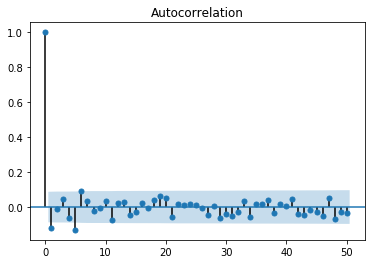

In [50]:
plot_acf(auto_y, lags = 50)